In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
aisles=pd.read_csv("Data/aisles.csv")
department=pd.read_csv("Data/departments.csv")
order_prior=pd.read_csv("Data/order_products__prior.csv")
order_train=pd.read_csv("Data/order_products__train.csv")
orders=pd.read_csv("Data/orders.csv")
products=pd.read_csv("Data/products.csv")
samp_subm=pd.read_csv("Data/sample_submission.csv")

In [15]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


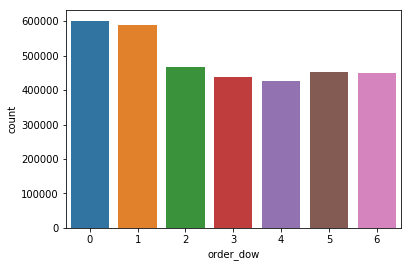

In [6]:
sns.countplot(x="order_dow", data=orders)
plt.show()

* most orders take place in first 2 days of the week -> 

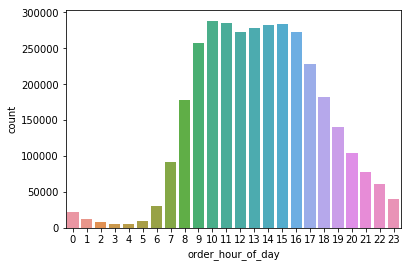

In [12]:
sns.countplot(x="order_hour_of_day", data=orders)


Most of the orders take place between 8 and 16 hours 

Text(0,0.5,'count')

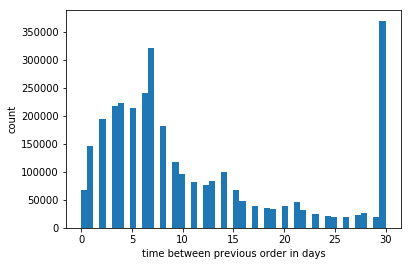

In [20]:
orders['days_since_prior_order'].plot(kind='hist',bins=50)
plt.xlabel('time between previous order in days')
plt.ylabel('count')

most of the customers give orders in a weekly and monthly basis as evident from the peaks at 7 and 30 days

In [13]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


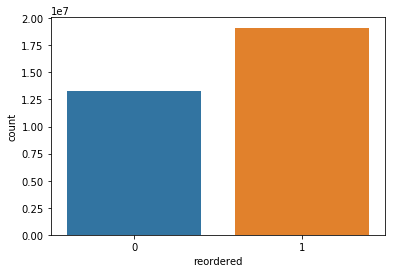

In [14]:
sns.countplot(x="reordered", data=order_prior)

* majority of the orders were reordered again

Text(0.5,0,'orders in cart')

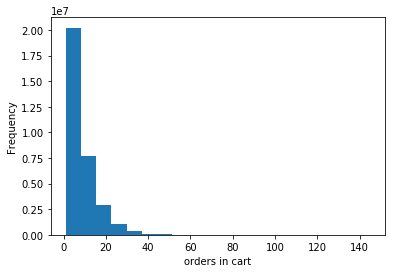

In [30]:
order_prior['add_to_cart_order'].plot(kind='hist',bins=20)
plt.xlabel('orders in cart')

* Objects in the cart were in the range from 0 to 40 with majority being 1 or 2 purchases

In [31]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [32]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [33]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [39]:
#merging dataframes order_prior and products
order_prior = pd.merge(order_prior, products, on='product_id', how='left')

In [41]:
#merging dataframe with aisles
order_prior=pd.merge(order_prior,aisles,on='aisle_id',how='left')

In [42]:
#merging dataframe with department
order_prior=pd.merge(order_prior,department,on='department_id',how='left')

In [43]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [91]:
depart_vise_aisle=order_prior.groupby(["department", "aisle"], as_index=False).size()
depart_vise_aisle

department     aisle                        
alcohol        beers coolers                      48657
               red wines                          35181
               specialty wines champagnes         11198
               spirits                            28102
               white wines                        30558
babies         baby accessories                    8160
               baby bath body care                 8581
               baby food formula                 382456
               diapers wipes                      24605
bakery         bakery desserts                    34871
               bread                             584834
               breakfast bakery                  250770
               buns rolls                        113015
               tortillas flat bread              193297
beverages      cocoa drink mixes                  21214
               coffee                            207075
               energy sports drinks              103615
   

In [71]:
clarity_color_table = pd.crosstab(index=order_prior["department"], 
                          columns=order_prior["aisle"])

clarity_color_table.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
department,,,,,,,,,,,,,,,,,,,,,
alcohol,0,0,0,0,0,0,0,0,0,48657,...,0,0,0,0,0,0,0,0,30558,0
babies,0,0,8160,8581,382456,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bakery,0,0,0,0,0,34871,0,0,0,0,...,0,0,0,193297,0,0,0,0,0,0
beverages,0,0,0,0,0,0,0,0,0,0,...,0,249341,0,0,0,0,0,841533,0,0
breakfast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


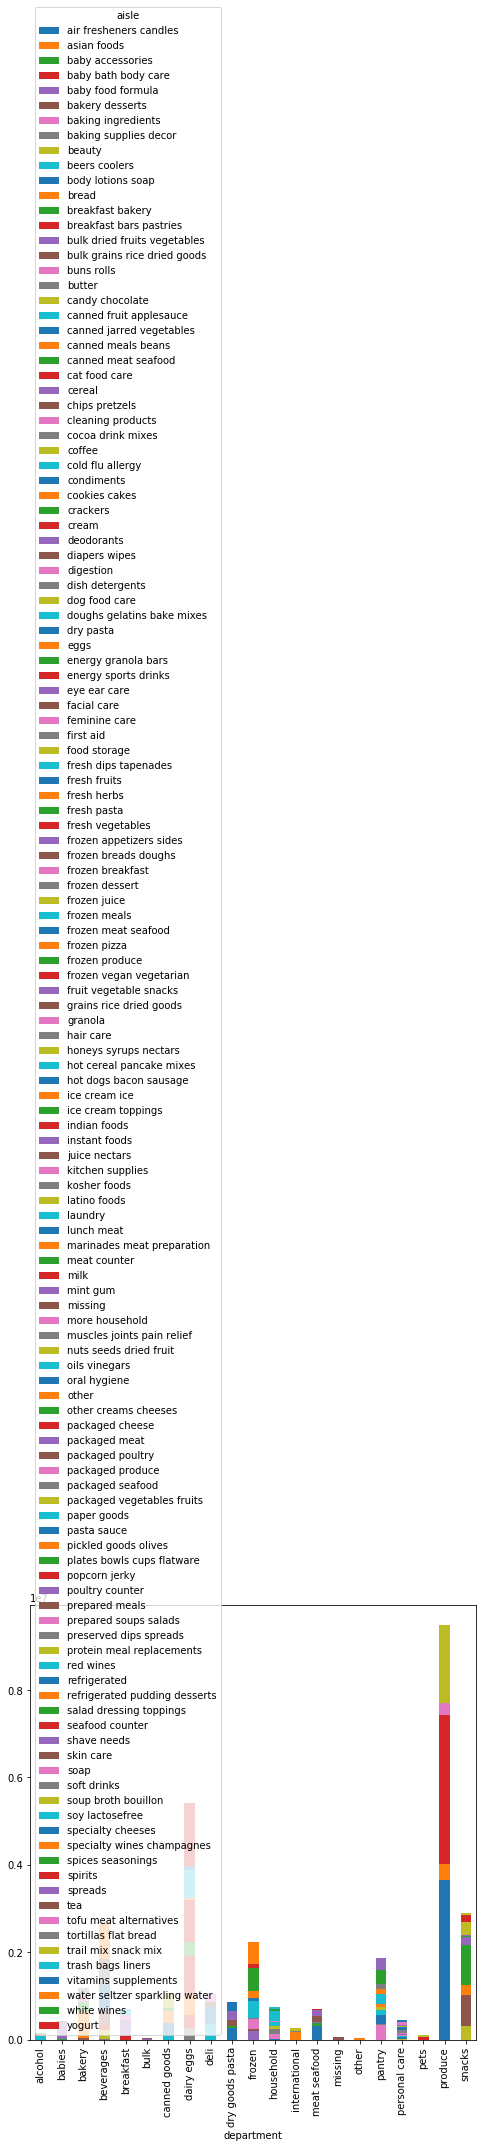

In [52]:
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

the most popular departments are produce and dairy eggs and following are the aisles people most frequently go to in Produce- fresh fruits and fresh vegetables. In dairy eggs department, people most frequently go to yogurt, milk and packaged cheese department.
The least popular departments are pets, bulk, missing, other etc which makes sense because
not everyone has pets and bulk purchase is usually not a popular choice among general population. 

In [98]:
prod_table = pd.crosstab(index=order_prior["product_name"], columns="count")

In [65]:
prod_table = prod_table.sort_values(['count'], ascending=[False])

In [67]:
prod_table.head(10)

col_0,count
product_name,
Banana,472565
Bag of Organic Bananas,379450
Organic Strawberries,264683
Organic Baby Spinach,241921
Organic Hass Avocado,213584
Organic Avocado,176815
Large Lemon,152657
Strawberries,142951
Limes,140627


following are the top 10 most popular orders. Almost all the items are fruits, vegetables and milk products and also include organic items which have gained popularity over the time 

In [70]:
prod_table = prod_table.sort_values(['count'], ascending=[True])
prod_table.head(10)

col_0,count
product_name,
Cajun Sides Dirty Rice,1
Drink Distinct All Natural Soda Pineapple Coconut & Nutmeg,1
Escapes Variety Pack,1
Lndbrg White Quinoa 16 Z,1
Chocolate Peppermint Tart,1
Organic Finely Shredded Sharp Cheddar Cheese,1
Vitality Chicken Breasts with Flaxseed & Vitamins Dog Treats,1
Original Lager,1
Aged Parmesan Cheese Sticks,1


following are the top 10 least sold items. From the looks of it, these items are not popularly bought and will probably only chosen by a niche sector of customers

In [95]:
count_table = pd.crosstab(index=order_prior["department"], 
                          columns=order_prior["reordered"])

In [96]:
count_table.head()

reordered,0,1
department,,
alcohol,66101,87595
babies,178433,245369
bakery,437599,739188
beverages,932237,1757892
breakfast,311556,398013


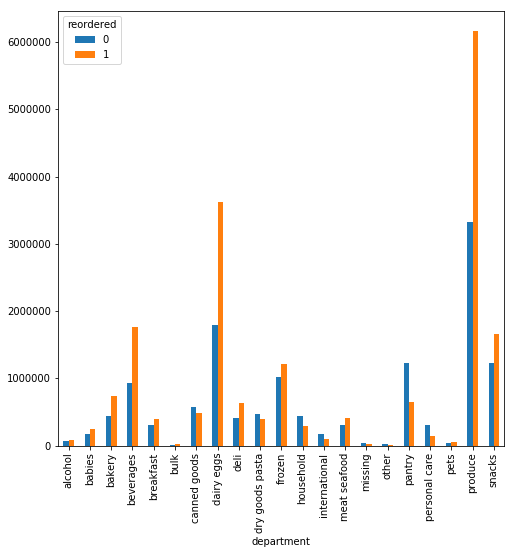

In [97]:
count_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

Following shows the department vise plot of how many times orders were ordered again.